# Hypothesis 1

### In this hypothesis we consider different location configurations of 12 medium type emergency unit buildings distributed across the city.

### Case 1 : All the emergency response units are placed on the corners. 1 on each corner and 2 evenly distributed across the edges.
### Case 2: All the emergency response units are placed on the inside, distributed in a similar fashion as case 1.
### Case 3: We consider a hybrid scenario where half the units are placed on the corners, the other half are placed in the interior region.

### Prediction: Locating emergency units in the corners reduces the number of directions than the corner units have access to, which is not efficient utilization of the emergency unit buildings. So, we hypothesis that Case 2 would provide the most optimal results as there would be no emergency units in the corners.

In [1]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit
import matplotlib.pyplot as plt

In [2]:
def visualize(city):
    units = EmergencyUnit.response_buildings
    small_unit_locs = [unit.location for unit in units if unit.available_capacity==3]
    medium_unit_locs = [unit.location for unit in units if unit.available_capacity==5]
    large_unit_locs = [unit.location for unit in units if unit.available_capacity==7]

    # small_emergency_unit_labels = dict()
    # medium_emergency_unit_labels = dict()
    # large_emergency_unit_labels = dict()
    color_map = dict()
    size_map = dict()
    pos=dict()
    node_coordinates=list(city.city_graph.nodes)
    height = city.height
    dim = city.zone_dimension
    for i in range(len(node_coordinates)):
        pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
        if node_coordinates[i] in small_unit_locs:
            color_map[node_coordinates[i]] = 'red'
            size_map[node_coordinates[i]] = 250
        elif node_coordinates[i] in medium_unit_locs:
            color_map[node_coordinates[i]] = 'blue'
            size_map[node_coordinates[i]] = 400
        elif node_coordinates[i] in large_unit_locs:
            color_map[node_coordinates[i]] = 'green'
            size_map[node_coordinates[i]] = 650
        else:
            color_map[node_coordinates[i]] = 'black'
            size_map[node_coordinates[i]] = 150
    colors = [ color_map.get(node) for node in city.city_graph.nodes]
    sizes = [ size_map.get(node) for node in city.city_graph.nodes]
    traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
    plt.figure(1, figsize=(9,9))
    nx.draw(city.city_graph, pos, node_size=sizes, node_color = colors)
    a=nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels, font_size=10)
    # nx.draw_networkx_labels(city.city_graph, pos, small_emergency_unit_labels, font_size=12, font_color='g')
    # nx.draw_networkx_labels(city.city_graph, pos, medium_emergency_unit_labels, font_size=12, font_color='g')
    # nx.draw_networkx_labels(city.city_graph, pos, large_emergency_unit_labels, font_size=12, font_color='g')
    plt.show()

In [3]:
def plot_graph(resp_times, successful_perc, resptime_file, perc_successful_file):
    df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 101)])
    plot1 = df1.plot(title = 'Covergence of Average Response Time of Emergencies')
    plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time (mins)')
    # plot1.show()
    df1.to_csv(resptime_file)
    df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, 
                       index = [_ for _ in range(1, 101)])
    plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
    plot2.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')
    # plot2.show()
    df2.to_csv(perc_successful_file)
    print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
    print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))

# Case 1 - Corner

In [4]:
city = main.configure_city_file('corner_medium_ps.txt')

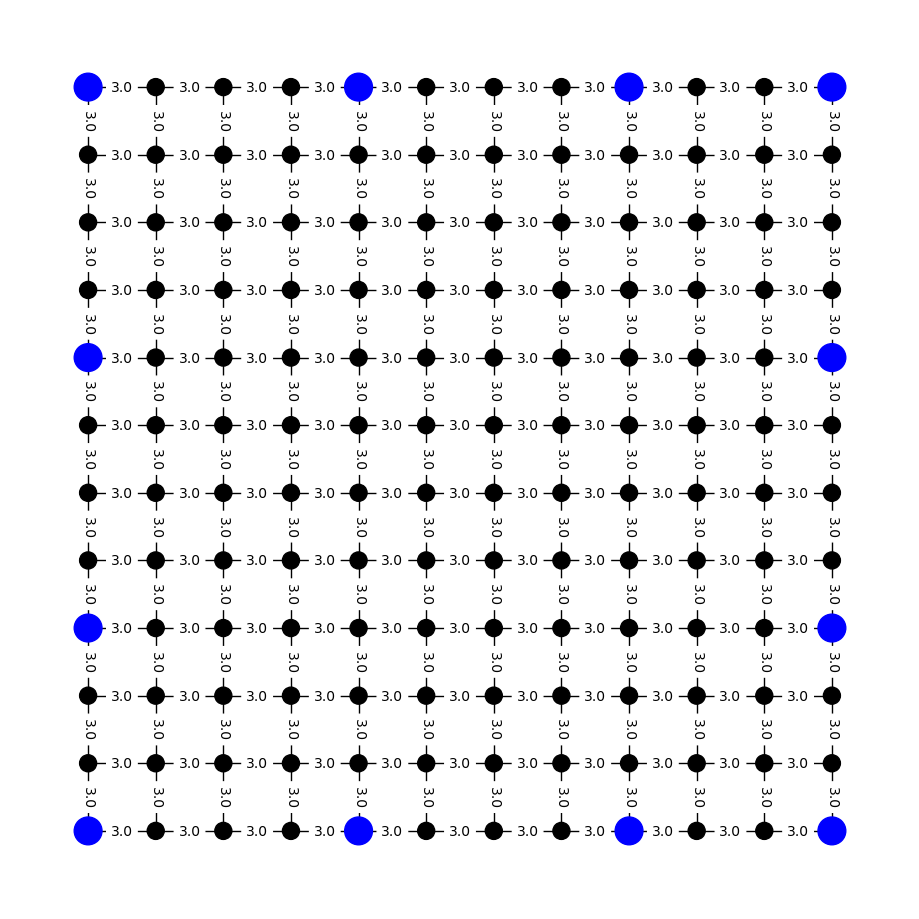

In [5]:
visualize(city)

In [6]:
resp_times, successful_perc, num_emergencies, emergency_dict = main.simulate(city)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [21:39<00:00, 12.99s/it]


Average Response Time: 9.72 mins
Average Percentage of Successfully Responded Emergencies: 54.45 %


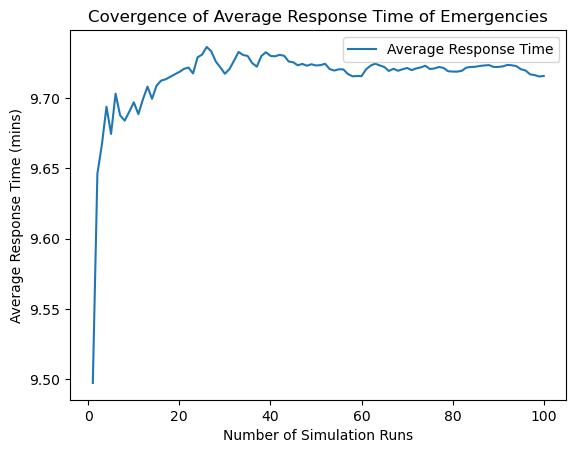

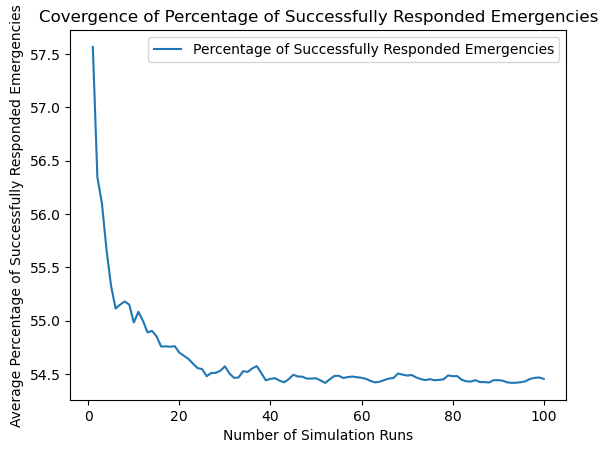

In [7]:
plot_graph(resp_times, successful_perc, 'hypothesis1_corner_resptime.csv', 'hypothesis1_corner_percsuccessful.csv')

# Case 2 - Inner

In [8]:
city = main.configure_city_file('inner_medium_ps.txt')

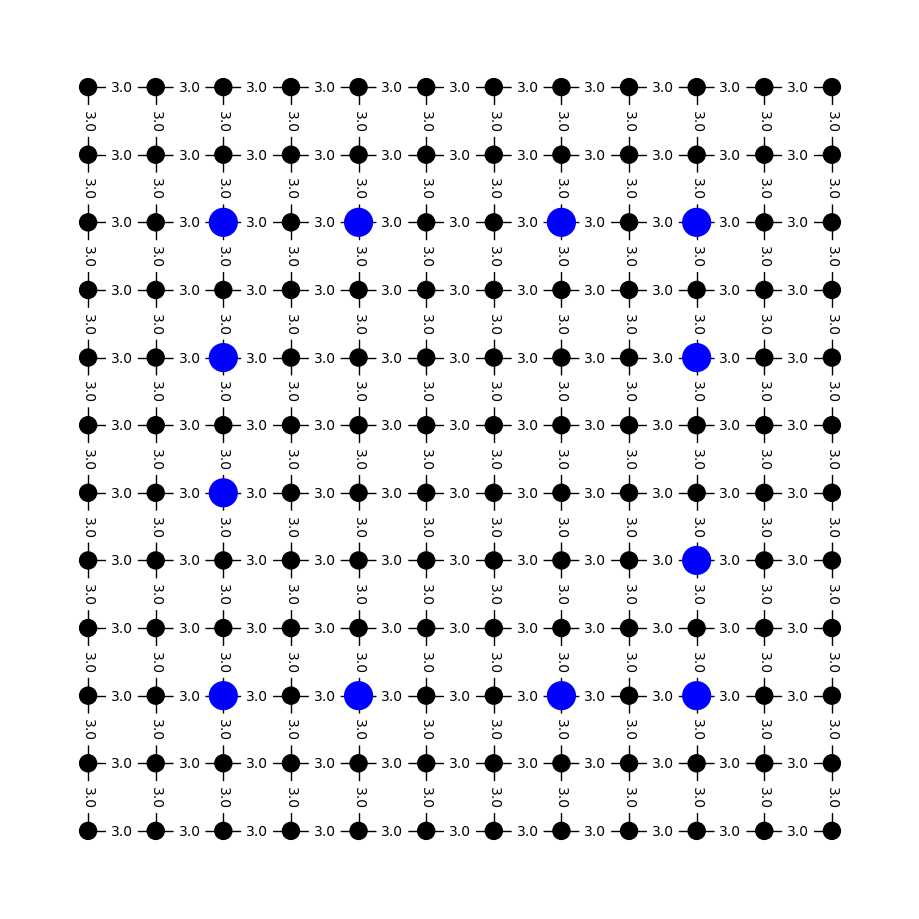

In [9]:
visualize(city)

In [10]:
resp_times, successful_perc, num_emergencies, emergency_dict = main.simulate(city)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [24:49<00:00, 14.89s/it]


Average Response Time: 7.43 mins
Average Percentage of Successfully Responded Emergencies: 73.04 %


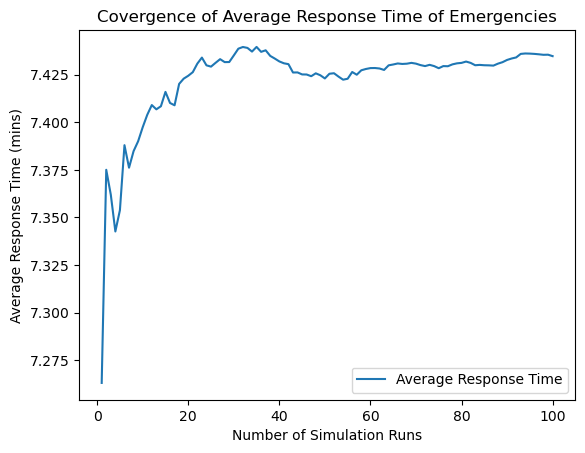

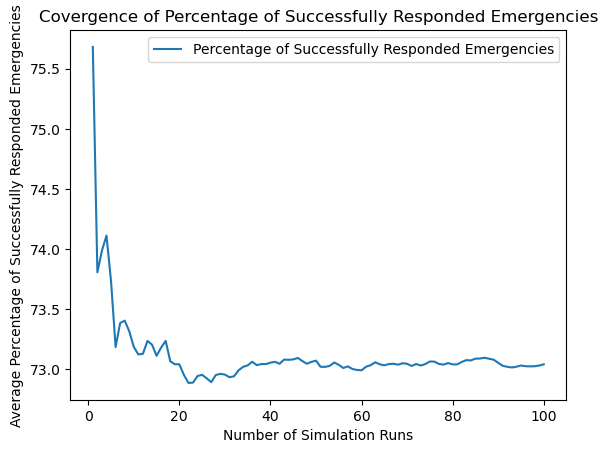

In [11]:
plot_graph(resp_times, successful_perc, 'hypothesis1_inner_resptime.csv', 'hypothesis1_inner_percsuccessful.csv')

# Case 3 - Hybrid

In [12]:
city = main.configure_city_file('hybrid_medium_ps.txt')

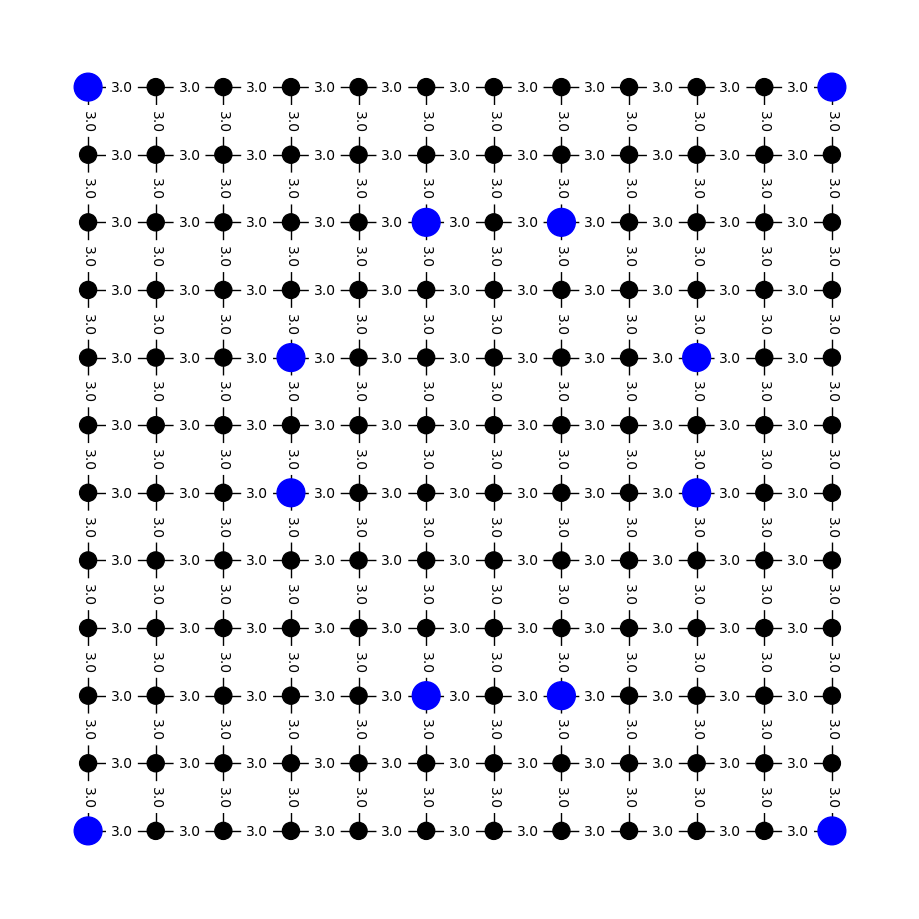

In [13]:
visualize(city)

In [14]:
resp_times, successful_perc, num_emergencies, emergency_dict = main.simulate(city)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [23:47<00:00, 14.27s/it]


Average Response Time: 7.91 mins
Average Percentage of Successfully Responded Emergencies: 66.71 %


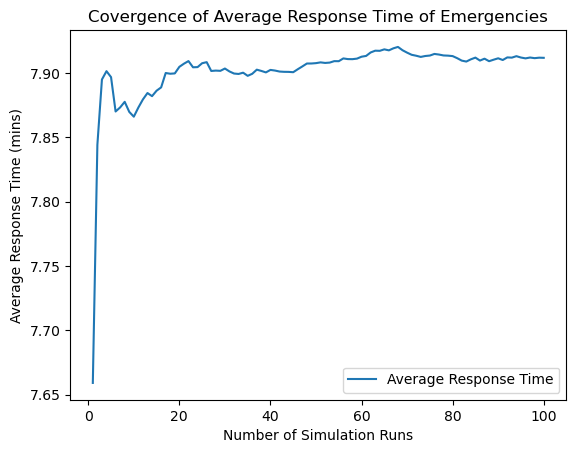

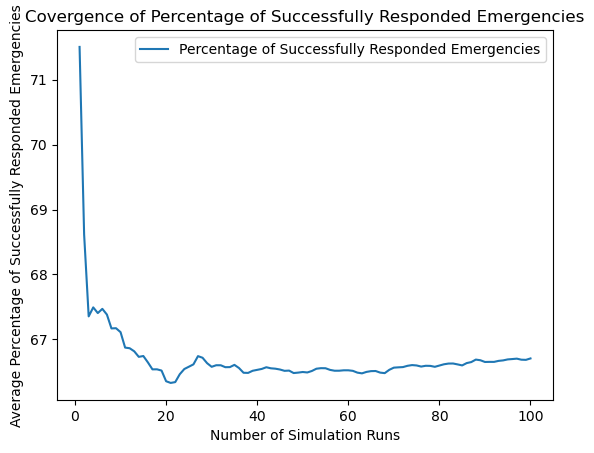

In [15]:
plot_graph(resp_times, successful_perc, 'hypothesis1_hybrid_resptime.csv', 'hypothesis1_hybrid_percsuccessful.csv')